In [1]:
from qiskit import QuantumCircuit

In [2]:
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import Layout

def interaction_map_count_from_circuit(circuit, layout=None, directed=False):
    """returns a interaction_map_count. Based on layout or trivial_layout if not provided"""
    dag = circuit_to_dag(circuit)
    if layout is None:
        layout = Layout.generate_trivial_layout(*dag.qregs.values())
    interaction_map = {}
    for gate in dag.two_qubit_ops():
        node1 = layout[gate.qargs[0]]
        node2 = layout[gate.qargs[1]]
        if not directed:
            edge = (node1, node2)
        else:
            edge = tuple(sorted((node1, node2)))
        interaction_map[edge] = interaction_map.get(edge, 0) + 1
    return interaction_map

/Applications/anaconda3/envs/qiskit-terra-dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import networkx as nx

def interarction_map_to_graph(interaction_map):
    G = nx.Graph()
    for edge, counts in interaction_map.items():
        G.add_edge(edge[0], edge[1], count=counts)
    return G

In [4]:
import matplotlib.pyplot as plt

def plot_interaction_map_graph(G):
    pos = nx.spring_layout(G)
    plt.figure()    
    nx.draw(G,pos,edge_color='black', node_color='gray',alpha=0.9,\
    labels={node:node for node in G.nodes()})
    edge_labels = {edge: attributes['count'] for edge, attributes in G.edges.items()}
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    plt.axis('off')
    plt.show()

In [5]:
from networkx.algorithms.tree import maximum_spanning_edges

def maximum_spanning_tree(graph):
    Gmst = nx.Graph()
    for edge in maximum_spanning_edges(graph, algorithm='kruskal', weight='count'):
        Gmst.add_edge(edge[0], edge[1], count=edge[2])
    return Gmst

/Applications/anaconda3/envs/qiskit-terra-dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
matrix = [[0, 1, 0, 0, 1, 0],
          [1, 0, 1, 0, 0, 0],
          [0, 1, 0, 1, 0, 0],
          [0, 0, 1, 0, 1, 0],
          [1, 0, 0, 1, 0]]
circuit = QuantumCircuit(6)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.cx(2, 0)
circuit.cx(3, 1)
circuit.cx(4, 3)
circuit.cx(4, 5)
circuit.cx(5, 3)

# have more than one
circuit.cx(5, 3)
for _ in range(2):
    circuit.cx(5, 4)
for _ in range(2):
    circuit.cx(0, 1)
for _ in range(2):
    circuit.cx(2, 1)

interaction_map_with_count = interaction_map_count_from_circuit(circuit)
interaction_map_with_count

{(0, 1): 3,
 (1, 2): 1,
 (2, 0): 1,
 (3, 1): 1,
 (4, 3): 1,
 (4, 5): 1,
 (5, 3): 2,
 (5, 4): 2,
 (2, 1): 2}

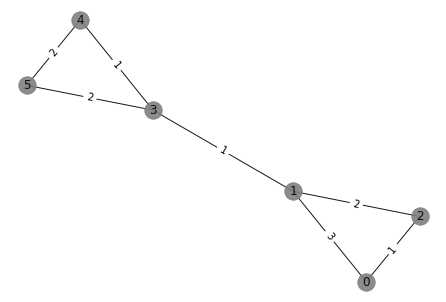

In [7]:
graph = interarction_map_to_graph(interaction_map_with_count)
plot_interaction_map_graph(graph)

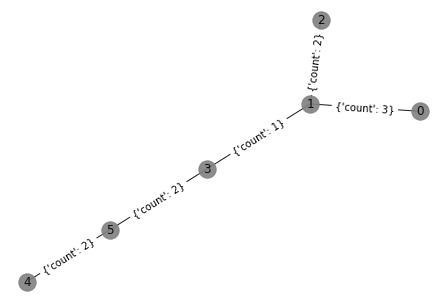

In [8]:
plot_interaction_map_graph(maximum_spanning_tree(graph))